In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter

### Regenerating mat_norm.csv

In [44]:
cell_meta_df = pd.read_csv('../data/HN_patient_specific/AS_et_al_cell_metadata.csv', index_col=0)
cell_info2_df = pd.read_csv('../data/HN_patient_specific/AS_et_al_cellInfo2.csv', index_col=0)

In [84]:
tpm_df = pd.read_csv('../data/HN_patient_specific/AS_et_al_GSE117872_good_Data_TPM.txt', index_col=0, sep='\t')
mat_norm_df = pd.read_csv('../data/HN_patient_specific/AS_et_al_mat_norm.csv', index_col=0)

In [26]:
print (tpm_df.shape, len(set(tpm_df.columns)))
tpm_df.head()

(22744, 1302) 1302


,RHC6558,RHC6559,RHC6560,RHC6561,RHC6562,RHC6563,RHC6564,RHC6565,RHC6566,RHC6567,...,RHH3293,RHH3294,RHH3295,RHH3296,RHH3297,RHH3298,RHH3299,RHH3300,RHH3301,RHH3302
SGIP1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CLIC4,65.612521,27.82005,5.346978,55.280499,35.660439,57.280826,24.720561,59.896676,31.197616,34.750544,...,14.878982,2.078769,0.994508,20.607399,0.587152,8.613303,41.279870,22.311535,14.113482,0.470892
AGBL4,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NECAP2,0.000000,0.00000,17.737031,10.187603,7.886204,69.671198,16.400643,14.717753,25.872237,10.978547,...,9.749464,0.000000,14.295617,0.000000,33.760226,5.602374,6.639218,58.935465,2.600963,223.893084
SLC45A1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
print (mat_norm_df.shape, len(set(mat_norm_df.columns)))
mat_norm_df.head()

(26968, 1241) 1241


,RHH2176,RHH2177,RHH2178,RHH2179,RHH2180,RHH2181,RHH2182,RHH2183,RHH2184,RHH2185,...,RHO708,RHO709,RHO710,RHO711,RHO712,RHO713,RHO714,RHO715,RHO716,RHO717
TSPAN6,0.706622,0.666556,1.181586,1.376983,0.333293,1.277527,0.165965,1.098623,0.909558,0.055538,...,1.446591,1.340236,0.0,1.258197,0.519422,0.996783,1.377194,1.406206,0.211878,0.755596
DPM1,0.000000,0.126950,0.618362,0.800224,0.622205,0.641901,0.239645,0.379495,0.198635,0.055538,...,1.559232,0.236974,0.0,0.391252,0.252127,1.331148,1.544517,0.971536,0.245017,0.345993
SCYL3,0.000000,0.000000,0.480101,0.185932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.243186,0.092798,0.0,0.348101,0.000000,0.000000,0.000000,0.026779,0.000000,0.091118
C1orf112,0.000000,0.000000,0.000000,0.185932,0.069451,0.000000,0.594648,0.000000,0.000000,0.000000,...,0.104470,0.000000,0.0,0.020605,0.000000,0.043263,0.012586,0.415857,0.067108,0.000000
FGR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [38]:
len(sorted(list(set(tpm_df.columns).difference(mat_norm_df.columns))))

607

In [39]:
len(sorted(list(set(mat_norm_df.columns).difference(tpm_df.columns))))

546

[TO SOLVE] There are 482 cells not in SRA

In [40]:
len(sorted(list(set(mat_norm_df.columns).difference(cell_meta_df.index))))

482

In [42]:
sorted(list(set(mat_norm_df.columns).difference(cell_meta_df.index)))

['RHH1470',
 'RHH1471',
 'RHH1472',
 'RHH1473',
 'RHH1474',
 'RHH1475',
 'RHH1476',
 'RHH1477',
 'RHH1478',
 'RHO238',
 'RHO239',
 'RHO240',
 'RHO241',
 'RHO242',
 'RHO243',
 'RHO244',
 'RHO245',
 'RHO246',
 'RHO247',
 'RHO248',
 'RHO249',
 'RHO250',
 'RHO251',
 'RHO252',
 'RHO253',
 'RHO254',
 'RHO255',
 'RHO256',
 'RHO257',
 'RHO258',
 'RHO259',
 'RHO260',
 'RHO261',
 'RHO262',
 'RHO263',
 'RHO264',
 'RHO265',
 'RHO266',
 'RHO267',
 'RHO268',
 'RHO269',
 'RHO270',
 'RHO271',
 'RHO272',
 'RHO273',
 'RHO274',
 'RHO275',
 'RHO276',
 'RHO277',
 'RHO278',
 'RHO279',
 'RHO280',
 'RHO281',
 'RHO282',
 'RHO283',
 'RHO284',
 'RHO285',
 'RHO286',
 'RHO287',
 'RHO288',
 'RHO289',
 'RHO290',
 'RHO291',
 'RHO292',
 'RHO293',
 'RHO294',
 'RHO295',
 'RHO296',
 'RHO297',
 'RHO298',
 'RHO299',
 'RHO300',
 'RHO301',
 'RHO302',
 'RHO303',
 'RHO304',
 'RHO305',
 'RHO306',
 'RHO307',
 'RHO308',
 'RHO309',
 'RHO310',
 'RHO311',
 'RHO312',
 'RHO313',
 'RHO314',
 'RHO315',
 'RHO316',
 'RHO317',
 'RHO318',
 

In [47]:
cell_info2_df.loc[sorted(list(set(mat_norm_df.columns).difference(cell_meta_df.index)))].groupby('cellLines').count()

,CA_site,Identity,identity2,Cluster
cellLines,,,,
HN137P,9,9,9,9
HN159M,94,94,94,94
HN159P,96,96,96,96
HN160M,91,91,91,91
HN160P,96,96,96,96
HN182M,96,96,96,96


In [30]:
common_cells = sorted(list(set(tpm_df.columns).intersection(mat_norm_df.columns)))
len(common_cells)

695

##### Comparing TPM and mat_norm

In [55]:
common_genes = sorted(list(set(tpm_df.index).intersection(mat_norm_df.index)))
len(common_genes)

16307

In [85]:
common_tpm_df = tpm_df.loc[common_genes, common_cells]
common_mat_norm_df = mat_norm_df.loc[common_genes, common_cells]

In [86]:
common_tpm_df.head()

,RHC6558,RHC6559,RHC6560,RHC6561,RHC6562,RHC6563,RHC6564,RHC6565,RHC6566,RHC6567,...,RHH2550,RHH2551,RHH2552,RHH2553,RHH2554,RHH2555,RHH2556,RHH2557,RHH2558,RHH2559
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
A1BG-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.25491,1.731829,0.0,0.0,0.0,0.0,0.0,0.0
A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
A2M-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
common_mat_norm_df.head()

,RHC6558,RHC6559,RHC6560,RHC6561,RHC6562,RHC6563,RHC6564,RHC6565,RHC6566,RHC6567,...,RHH2550,RHH2551,RHH2552,RHH2553,RHH2554,RHH2555,RHH2556,RHH2557,RHH2558,RHH2559
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
A1BG-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.100978,0.002239,0.0,0.0,0.0,0.0,0.0,0.0
A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
A2M-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
(common_tpm_df - common_mat_norm_df).sum().sum()

683425274.1415608

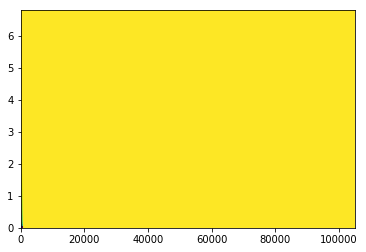

In [122]:
x = np.array(common_tpm_df).flatten()
sel = x > 0
y = np.array(common_mat_norm_df).flatten()

_ = plt.hist2d(x[sel], y[sel], bins=100, cmap='viridis_r')

In [89]:
(np.log1p(common_tpm_df+1) - common_mat_norm_df).sum().sum()

18923555.19343673

In [90]:
common_norm1_df = np.log1p((common_tpm_df / common_tpm_df.sum()) * 100000)

In [91]:
(common_norm1_df - common_mat_norm_df).sum().sum()

5194507.823173661

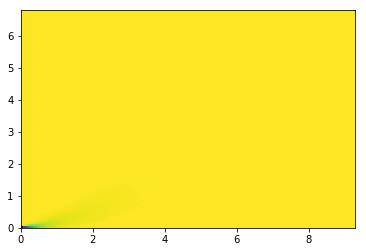

In [126]:
x = np.array(common_norm1_df).flatten()
sel = x > 0
y = np.array(common_mat_norm_df).flatten()

_ = plt.hist2d(x[sel], y[sel], bins=100, cmap='viridis_r', )

In [129]:
common_norm2_df = np.log1p((common_norm1_df / common_norm1_df.sum()) * 100000)

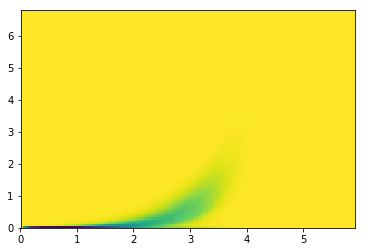

In [130]:
x = np.array(common_norm2_df).flatten()
sel = x > 0
y = np.array(common_mat_norm_df).flatten()

_ = plt.hist2d(x[sel], y[sel], bins=100, cmap='viridis_r', )

In [131]:
common_norm3_df = np.log1p((common_norm2_df / common_norm2_df.sum()) * 100000)

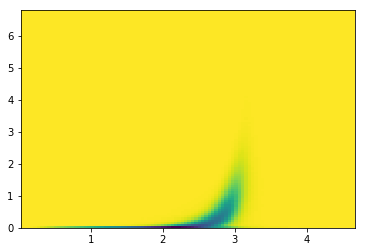

In [133]:
x = np.array(common_norm3_df).flatten()
sel = x > 0
y = np.array(common_mat_norm_df).flatten()

_ = plt.hist2d(x[sel], y[sel], bins=100, cmap='viridis_r', )